<a href="https://colab.research.google.com/github/kacpercierpiak/AED_LAB/blob/main/AED_L_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORYTMY I EKSPLORACJA DANYCH**
# *LAB1 - Eksploracja zbiorów danych*


In [48]:
import shutil

shutil.rmtree('./AED_LAB_DATA', ignore_errors=True)
!git clone https://github.com/kacpercierpiak/AED_LAB_DATA.git

rootPath = './AED_LAB_DATA/LAB1/'

Cloning into 'AED_LAB_DATA'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


### **Zadanie 1**
Wczytaj dane pobrane z serwisu kaggle.com do obiektu DataFrame.

Link do zbioru danych CSV: 
https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv 



In [49]:
import pandas as pd
df = pd.read_csv (rootPath+'netflix_titles.csv')

**Jako wynik działania programu wypisz następujące informacje:**
1. Ilość wczytanych wierszy danych

In [50]:
print(len(df))

8807


2. Wymiar wczytanych danych (kolumny x indeksy) 

In [52]:
print(str(df.shape[1]) + ' x ' + str(df.shape[0]))

12 x 8807


3. Zlicz ilość wartość pustych (jeśli w są) w każdej z kolumn 

In [20]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Suma wszystkich pustych wartości

In [22]:
print(df.isnull().sum().sum())

4307

### **Zadanie 2**
Wczytaj dane o nazwie titanic pobrane z biblioteki seaborn do obiektu DataFrame.

In [60]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
print('Ilosc NaN w zbiorze')
print(titanic.isna().sum().sum())


Ilosc NaN w zbiorze
869


In [61]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [62]:
thresh = len(titanic) * .3
titanic.dropna(thresh = thresh, axis = 1, inplace = True)
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64


In [63]:
titanic['sex'].replace(['female','male'],[0,1],inplace=True)

### **Zadanie 3**
Na podstawie danych publikowanych w serwisie GitHub za pomocą GitHub API wykonaj
następujące operacje:

In [146]:
import urllib.request, json 
import pandas as pd
#with urllib.request.urlopen("https://api.github.com/users/MikiKru/repos") as url:
   # data = json.loads(url.read().decode())
df = pd.json_normalize(data)
result = df['language'].value_counts()
result = result.append(pd.Series(len(df)-result.sum(),index=['None'], name='language'))
result = result/len(df)*100
print(result)




Java                46.666667
C++                 13.333333
Python              10.000000
Jupyter Notebook     6.666667
CMake                3.333333
C#                   3.333333
TSQL                 3.333333
None                13.333333
Name: language, dtype: float64


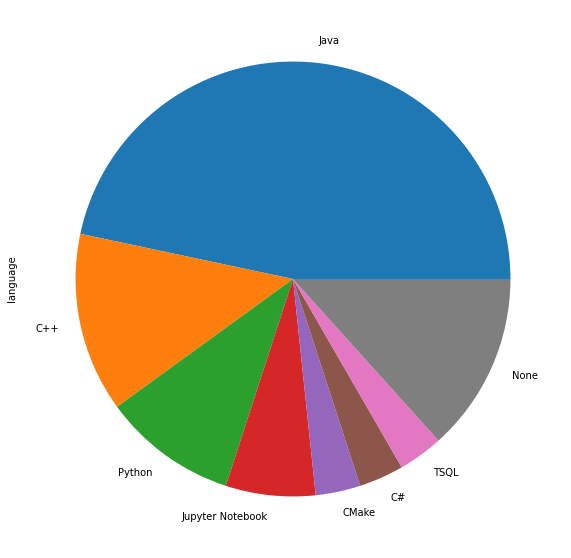

In [147]:
result.plot.pie(figsize=(10, 10))